# Evaluating Word Representations

## Getting the pre-trained word vectors

In this part, we read the word embeddings from the files.

In [1]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
from scipy import stats

In [2]:
bow2_file = 'bow2.words'
bow5_file = 'bow5.words'
dependency_file = 'deps.words'

#read the files
with open(bow2_file) as f:
    bow2 = f.readlines()
    
with open(bow5_file) as f:
    bow5 = f.readlines()
    
with open(dependency_file) as f:
    dependency = f.readlines()
  

In [3]:
print(len(bow2))
print(len(bow5))
print(len(dependency))

183870
183870
174015


We found out that the number of word embeddings were different for BoW vs. dependency. However, as we use the word pairs from the human rating files, we use the same subset of embeddings.

In [4]:
word2 = []
word5 = []
word_deps = []

#dictionaries for word embeddings
#key is the string word
#value is the 300 dimensional embedding

vector2 = dict()
vector5 = dict()
vector_deps = dict()

In [5]:
#fill in the word arrays and the respective vector arrays

#bow2
for l in bow2:
    #split line
    split_line = str.split(l)
    
    #first one is the word - string
    word = split_line[0]
    word2.append(word)
    
    #remaining elements are the embedding values - float
    vector = []
    for vd in split_line[1:]:
        vector.append(float(vd))
        
    vector2[word] = vector
    

In [6]:
#bow5
for l in bow5:
    #split line
    split_line = str.split(l)
    
    #first one is the word - string
    word = split_line[0]
    word5.append(word)
    
    #remaining elements are the embedding values - float
    vector = []
    for vd in split_line[1:]:
        vector.append(float(vd))
        
    vector5[word] = vector

In [7]:
#dependency
for l in dependency:
    #split line
    split_line = str.split(l)
    
    #first one is the word - string
    word = split_line[0]
    word_deps.append(word)
    
    #remaining elements are the embedding values - float
    vector = []
    for vd in split_line[1:]:
        vector.append(float(vd))
        
    vector_deps[word] = vector

## Word Similarity Task
In this part, we define the methods to get the human scores and the cosine similarities of the word pairs. We first define the normalized version, in which we normalize the scores by subtracting the minimum and dividing by the range of values. Then, we define the method that does not normalize the human scores.

In [11]:
#function to get the human ratings and cosine similarities (ratings are normalized to [0,1])

def get_scores_cosines(keys, word_pairs, vector_embeds, norm_min, norm_max):
    scores = []
    cosines = []

    #key is a tuple indicating a pair from the human scores dataset
   
    for key in keys:
       
        #words of a given pair
        word1 = key[0]
        word2 = key[1]
        
        #human ratings of similarity or relatdness
        score = (float(score) - norm_min)/(norm_max - norm_min) #normalization
        
        #if both of the words are in the vector embeddings, get their embeddings and calculate the cos similarity
        if word1 in vector_embeds.keys() and word2 in vector_embeds.keys():
            word1_embed = vector_embeds[word1]
            word2_embed = vector_embeds[word2]
            
            #sim = 1 - distance
            cosine_similarity = 1 - spatial.distance.cosine(word1_embed, word2_embed)
            scores.append(score)
            cosines.append(cosine_similarity)
            
            
    return scores, cosines
        

In [12]:
#function to get the human ratings and cosine similarities  (ratings are NOT normalized to [0,1]

def get_scores_cosines_not_normalize(keys, word_pairs, vector_embeds):
    
    scores = []
    cosines = []

    #key is a tuple indicating a pair from the human scores dataset
    
    for key in keys:
        
        #words of a given pair
        word1 = key[0]
        word2 = key[1]
        
        #human ratings of similarity or relatdness
        score = float(word_pairs[(word1,word2)])
        
        #if both of the words are in the vector embeddings, get their embeddings and calculate the cos similarity
        if word1 in vector_embeds.keys() and word2 in vector_embeds.keys():
            word1_embed = vector_embeds[word1]
            word2_embed = vector_embeds[word2]
                                
            #sim = 1 - distance
            cosine_similarity = 1 - spatial.distance.cosine(word1_embed, word2_embed)
            
            scores.append(score)
            cosines.append(cosine_similarity)
            
            
    return scores, cosines
        

We first read the full MEN dataset comprised of natural word forms. 

In [13]:
#natural form MEN dataset
word_pairs = {}

filename = 'MEN/MEN_dataset_natural_form_full'

with open(filename) as f:
    lines = f.readlines()
    
for line in lines:
    line = line.split()
    word1 = line[0]
    word2 = line[1]
    score = line[2]
    word_pairs[(word1,word2)] = score
    
keys = list(word_pairs.keys())

In [17]:
norm_max = 50 #for MEN
norm_min = 0 #for MEN

#normalized

#vector2 and cosine similarity comparison
scores_2, cosines_2 = get_scores_cosines(keys, word_pairs, vector2, norm_min, norm_max)

#vector5 and cosine similarity comparison
scores_5, cosines_5 = get_scores_cosines(keys, word_pairs, vector5, norm_min, norm_max)

#vector_deps and cosine similarity comparison
scores_deps, cosines_deps = get_scores_cosines(keys, word_pairs, vector_deps, norm_min, norm_max)


#non-normalized
#vector2 and cosine similarity comparison
scores_2_nn, cosines_2_nn = get_scores_cosines_not_normalize(keys, word_pairs, vector2)

#vector5 and cosine similarity comparison
scores_5_nn, cosines_5_nn = get_scores_cosines_not_normalize(keys, word_pairs, vector5)

#vector_deps and cosine similarity comparison
scores_deps_nn, cosines_deps_nn = get_scores_cosines_not_normalize(keys, word_pairs, vector_deps)

In the cell below, we check if the correlation results when using the normalized or the non-normalized scores are different for the MEN dataset.

In [30]:
print(pearsonr(scores_2, cosines_2))
print(pearsonr(scores_2_nn, cosines_2_nn))

print(spearmanr(scores_2, cosines_2))
print(spearmanr(scores_2_nn, cosines_2_nn))


print(pearsonr(scores_5, cosines_5))
print(pearsonr(scores_5_nn, cosines_5_nn))

print(spearmanr(scores_5, cosines_5))
print(spearmanr(scores_5_nn, cosines_5_nn))


print(pearsonr(scores_deps, cosines_deps))
print(pearsonr(scores_deps_nn, cosines_deps_nn))

print(spearmanr(scores_deps, cosines_deps))
print(spearmanr(scores_deps_nn, cosines_deps_nn))

(0.67769822446992301, 0.0)
(0.67769822446992301, 0.0)
SpearmanrResult(correlation=0.69990475583081901, pvalue=0.0)
SpearmanrResult(correlation=0.69990475583081901, pvalue=0.0)
(0.70823624804715701, 0.0)
(0.7082362480471569, 0.0)
SpearmanrResult(correlation=0.72316865613688441, pvalue=0.0)
SpearmanrResult(correlation=0.72316865613688441, pvalue=0.0)
(0.59740160446667256, 1.0183783114137056e-289)
(0.59740160446667256, 1.0183783114137056e-289)
SpearmanrResult(correlation=0.61782279002070517, pvalue=2.3702603610424921e-315)
SpearmanrResult(correlation=0.61782279002070517, pvalue=2.3702603610424921e-315)


We found out that the results are in fact the same for the normalized vs. non-normalized datasets. **Pearson** explains the linear proportional relation between the datasets; hence, the difference between the means does not affect the correlation coefficient. **Spearman**, on the other hand, represents the values by their ranks and account for monotonic, non-linear correlation and more robust to outliers, as well. This might explain the higher values we obtained with Spearman compared to Pearson.

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

We also check for the normality of the datasets, just to observe if the scores are normally-distributed.

In the cell below, we define a function to extract the statistical outcomes given the normalized human ratings and the cosine similarities. We report the means, standard deviations, normality test results and t-test results we applied for exploration.

In [21]:
def get_stats(cosines_2, scores_2, cosines_5, scores_5, cosines_deps, scores_deps):
    cosines_2 = np.asarray(cosines_2)
    cosines_5 = np.asarray(cosines_5)
    cosines_deps = np.asarray(cosines_deps)

    #report means and stds
    mean_cos_2 = np.mean(cosines_2)
    std_cos_2 = np.std(cosines_2)

    mean_cos_5 = np.mean(cosines_5)
    std_cos_5 = np.std(cosines_5)

    mean_cos_deps = np.mean(cosines_deps)
    std_cos_deps= np.std(cosines_deps)

    print('Means and stds')
    print('Bow2:',mean_cos_2, std_cos_2)
    print('Bow5:',mean_cos_5, std_cos_5)
    print('Deps:',mean_cos_deps, std_cos_deps)
    
    print()
    
    #normality tests
    print('Normality tests')
    print('Bow2 scores:',stats.normaltest(scores_2)[1])
    print('Bow5 scores:',stats.normaltest(scores_5)[1])
    print('Deps scores:',stats.normaltest(scores_deps)[1])
    print()
    print('Bow2 cosines:',stats.normaltest(cosines_2)[1])
    print('Bow5 cosines:',stats.normaltest(cosines_5)[1])
    print('Deps cosines:',stats.normaltest(cosines_deps)[1])
    print()
    
    #difference between the embed types cosine similarities
    print('T-test between Bow2 and Bow5')
    print(stats.ttest_ind(cosines_2, cosines_5)[1])
    print('T-test between Bow2 and Dependency')
    print(stats.ttest_ind(cosines_2, cosines_deps)[1])
    print('T-test between Dependency and Bow2')
    print(stats.ttest_ind(cosines_deps, cosines_5)[1])
    print()
    
    #difference between the embed types cosine similarities vs human ratings
    print('T-test between Bow2 and human scores')
    print(stats.ttest_ind(cosines_2, scores_2)[1])
    print('T-test between Bow5 and human scores')
    print(stats.ttest_ind(cosines_5, scores_5)[1])
    print('T-test between Dependency and human scores')
    print(stats.ttest_ind(cosines_deps, scores_deps)[1])
    print()
    
    #correlation tests for bow2
    pr_2, sig_p_2 = pearsonr(scores_2, cosines_2)
    spr_2, sig_s_2 = spearmanr(scores_2, cosines_2)

    print('Correlation results for BOW2 vs. human ratings')
    print('Pearson\'s r:',pr_2, 'p-value =', sig_p_2)
    print('Spearman\'s r:',spr_2, 'p-value =', sig_s_2)
    print()
    ###

    #correlation tests for bow5
    pr_5, sig_p_5 = pearsonr(scores_5, cosines_5)
    spr_5, sig_s_5 = spearmanr(scores_5, cosines_5)

    print('Correlation results for BOW5 vs. human ratings')
    print('Pearson\'s r:',pr_5, 'p-value =', sig_p_5)
    print('Spearman\'s r:',spr_5, 'p-value =', sig_s_5)
    print()

    ###
    #correlation tests for dependency
    pr_deps, sig_p_deps = pearsonr(scores_deps, cosines_deps)
    spr_deps, sig_s_deps = spearmanr(scores_deps, cosines_deps)

    print('Correlation results for Dependency vs. human ratings')
    print('Pearson\'s r:',pr_deps, 'p-value =', sig_p_deps)
    print('Spearman\'s r:',spr_deps, 'p-value =', sig_s_deps)

In [35]:
if 'stair' in vector2 and 'stairs' in vector2:
    if 'stair' in vector5 and 'stairs' in vector5:
        if 'stair' in vector_deps and 'stairs' in vector_deps:
            print('Both are in all the sets')

Both are in all the sets


Natural form as well as the lemmatized form exist in the embeddings.

In [44]:
print('***Stats for MEN natural form***')
get_stats(cosines_2, scores_2, cosines_5, scores_5, cosines_deps, scores_deps)

***Stats for MEN natural form***
Means and stds
Bow2: 0.414526703042 0.151395221895
Bow5: 0.394065125766 0.177624443678
Deps: 0.51009262559 0.14463670385

Normality tests
Bow2 scores: 4.38064395798e-91
Bow5 scores: 4.38064395798e-91
Deps scores: 4.38064395798e-91

Bow2 cosines: 0.0068174623159
Bow5 cosines: 5.0465250376e-05
Deps cosines: 0.00270064091624

T-test between Bow2 and Bow5
0.0056880562319
T-test between Bow2 and Dependency
7.23679328236e-45
T-test between Dependency and Bow2
2.88769953723e-54

T-test between Bow2 and human scores
1.21687154224e-05
T-test between Bow5 and human scores
5.44130401006e-10
T-test between Dependency and human scores
1.63990179398e-08

Correlation results for BOW2 vs. human ratings
Pearson's r: 0.428458661816 p-value = 7.99299665224e-46
Spearman's r: 0.414145767773 p-value = 1.22681286925e-42

Correlation results for BOW5 vs. human ratings
Pearson's r: 0.375600597067 p-value = 8.6074105723e-35
Spearman's r: 0.367396136698 p-value = 2.97757810672e-3

**MEN natural form:** Scores and cosines are not normally distributed, p < 0.01; therefore, the t-tests are not meaningful. We inspect the correlation results for the similarity scores vs. human ratings. They all indicate a significant positive correlation, p < 0.01. When we look at the values, we see that for this dataset, BoW5 finds higher correlation, then BoW2 and then Dependency. This means that BoW5 is better at predicting and approximating relatednes judgements of humans.

We also look at the **lemmatized MEN dataset**, which consists of the same words without suffixes. 

In [28]:
#lemmatized MEN, which includes POS-tags and words with inflections 

word_pairs = {}
pos_tag_pairs = {}

filename = 'MEN/MEN_dataset_lemma_form_full'

with open(filename) as f:
    lines = f.readlines()
    
for line in lines:
    line = line.split()
    
    word_pos_1 = line[0]
    split_wp = word_pos_1.split('-')
    word1 = split_wp[0]
    pos1 = split_wp[1]
    
    word_pos_2 = line[1]
    split_wp = word_pos_2.split('-')
    word2= split_wp[0]
    pos2 = split_wp[1]
    
    score = line[2]
    word_pairs[(word1,word2)] = score
    pos_tag_pairs[(word1, word2)] = (pos1, pos2)
    
keys = list(word_pairs.keys())

In [30]:
#vector2 and cosine similarity comparison
scores_2, cosines_2 = get_scores_cosines(keys, word_pairs, vector2, norm_min, norm_max)

#vector5 and cosine similarity comparison
scores_5, cosines_5 = get_scores_cosines(keys, word_pairs, vector5, norm_min, norm_max)

#vector2 and cosine similarity comparison
scores_deps, cosines_deps = get_scores_cosines(keys, word_pairs, vector_deps, norm_min, norm_max)

print('***Stats for MEN lemma form***')
get_stats(cosines_2, scores_2, cosines_5, scores_5, cosines_deps, scores_deps)

***Stats for MEN lemma form***
Means and stds
Bow2: 0.316803512667 0.145607303311
Bow5: 0.308255587339 0.186932626717
Deps: 0.403399757048 0.149368049522

Normality tests
Bow2 scores: 0.0
Bow5 scores: 0.0
Deps scores: 0.0

Bow2 cosines: 4.79219186707e-25
Bow5 cosines: 5.29522735224e-57
Deps cosines: 4.32604518066e-30

T-test between Bow2 and Bow5
0.0482493426745
T-test between Bow2 and Dependency
8.03242845857e-110
T-test between Dependency and Bow2
3.04144684951e-101

T-test between Bow2 and human scores
5.14499760051e-246
T-test between Bow5 and human scores
4.15970305652e-232
T-test between Dependency and human scores
8.876674085e-74

Correlation results for BOW2 vs. human ratings
Pearson's r: 0.669495069415 p-value = 0.0
Spearman's r: 0.686061690441 p-value = 0.0

Correlation results for BOW5 vs. human ratings
Pearson's r: 0.703135928466 p-value = 0.0
Spearman's r: 0.715675453077 p-value = 0.0

Correlation results for Dependency vs. human ratings
Pearson's r: 0.58814663439 p-value 

**MEN lemmatized:**
Scores and cosines are again not normally distributed p < 0.01; therefore, the t-tests are not meaningful. We inspect the correlation results for the similarity scores vs. human ratings. They all indicate a significant positive correlation, p < 0.01. When we look at the values, we see that for this dataset, BoW5 finds higher correlation, then BoW2 and then Dependency. This means that BoW5 is better at predicting and approximating relatednes judgements of humans.


In [29]:
len(cosines_2)

3000

In [25]:
def get_pair_count(keys, vector_embeds):
    count = 0
    
    for key in keys:
        word1 = key[0]
        word2 = key[1]
        if word1 in vector_embeds.keys() and word2 in vector_embeds.keys():
            count = count + 1
        else:
            print(word1, word2)
           
    return count

In [26]:
print(get_pair_count(keys, vector2), get_pair_count(keys, vector5),get_pair_count(keys, vector_deps))

3000 3000 3000


We also obtain the pairs and scores in SimLex-999 set.

In [40]:
# Simlex Dataset Read

word_pairs = {}

filename = 'SimLex-999/SimLex-999.txt'

with open(filename) as f:
    lines = f.readlines()
    
lines = lines[1:]
for line in lines:
    line = line.split()
    word1 = line[0]
    word2 = line[1]
    score = line[3]
    word_pairs[(word1,word2)] = score
    
keys = list(word_pairs.keys())

In [41]:
'disorganize' in vector2 #this one is not in the embedding vectors

False

In [42]:
norm_min = 0 #For SimLex
norm_max = 10 #For SimLex

#vector2 and cosine similarity comparison
scores_2, cosines_2 = get_scores_cosines(keys, word_pairs, vector2, norm_min, norm_max)

#vector5 and cosine similarity comparison
scores_5, cosines_5 = get_scores_cosines(keys, word_pairs, vector5, norm_min, norm_max)

#vector2 and cosine similarity comparison
scores_deps, cosines_deps = get_scores_cosines(keys, word_pairs, vector_deps, norm_min, norm_max)

print('***Stats for SimLex***')
get_stats(cosines_2, scores_2, cosines_5, scores_5, cosines_deps, scores_deps)

***Stats for SimLex***
Means and stds
Bow2: 0.414526703042 0.151395221895
Bow5: 0.394065125766 0.177624443678
Deps: 0.51009262559 0.14463670385

Normality tests
Bow2 scores: 4.38064395798e-91
Bow5 scores: 4.38064395798e-91
Deps scores: 4.38064395798e-91

Bow2 cosines: 0.0068174623159
Bow5 cosines: 5.0465250376e-05
Deps cosines: 0.00270064091624

T-test between Bow2 and Bow5
0.0056880562319
T-test between Bow2 and Dependency
7.23679328236e-45
T-test between Dependency and Bow2
2.88769953723e-54

T-test between Bow2 and human scores
1.21687154224e-05
T-test between Bow5 and human scores
5.44130401006e-10
T-test between Dependency and human scores
1.63990179398e-08

Correlation results for BOW2 vs. human ratings
Pearson's r: 0.428458661816 p-value = 7.99299665224e-46
Spearman's r: 0.414145767773 p-value = 1.22681286925e-42

Correlation results for BOW5 vs. human ratings
Pearson's r: 0.375600597067 p-value = 8.6074105723e-35
Spearman's r: 0.367396136698 p-value = 2.97757810672e-33

Correla

Above, we report the results for the **SimLex** file. Since the normality tests indicate non-normality, we do not explain the t-test outcomes. The difference here is that Dependency-based embeddings result in the highest correlation, followed by BoW2 and BoW5.

Below, we apply the same process **separately to the Adjective pairs, Verb pairs and the Noun pairs** available in SimLex-999.

In [43]:
#similarity results for adjectives, nouns, verbs separately

word_pairs_adj = {}
word_pairs_noun = {}
word_pairs_verb = {}


filename = 'SimLex-999/SimLex-999.txt'

with open(filename) as f:
    lines = f.readlines()
    
lines = lines[1:]
for line in lines:
    line = line.split()
    word1 = line[0]
    word2 = line[1]
    score = line[3]
    if line[2] == "A":
        word_pairs_adj[(word1,word2)] = score
    
    if line[2] == "N":
        word_pairs_noun[(word1,word2)] = score
    if line[2] == "V":
        word_pairs_verb[(word1,word2)] = score
        
keys_adj = list(word_pairs_adj.keys())
keys_noun = list(word_pairs_noun.keys())
keys_verb = list(word_pairs_verb.keys())



norm_min = 0 #For SimLex
norm_max = 10 #For SimLex

scores_adj_2, cosines_adj_2 = get_scores_cosines(keys_adj, word_pairs_adj, vector2, norm_min, norm_max)
scores_adj_5, cosines_adj_5 = get_scores_cosines(keys_adj, word_pairs_adj, vector5, norm_min, norm_max)
scores_adj_deps, cosines_adj_deps = get_scores_cosines(keys_adj, word_pairs_adj, vector_deps, norm_min, norm_max)

print('***Stats for SimLex adjectives***')
get_stats(cosines_adj_2, scores_adj_2, cosines_adj_5, scores_adj_5, cosines_adj_deps, scores_adj_deps)


scores_noun_2, cosines_noun_2 = get_scores_cosines(keys_noun, word_pairs_noun, vector2, norm_min, norm_max)
scores_noun_5, cosines_noun_5 = get_scores_cosines(keys_noun, word_pairs_noun, vector5, norm_min, norm_max)
scores_noun_deps, cosines_noun_deps = get_scores_cosines(keys_noun, word_pairs_noun, vector_deps, norm_min, norm_max)

print('***Stats for SimLex nouns***')
get_stats(cosines_noun_2, scores_noun_2, cosines_noun_5, scores_noun_5, cosines_noun_deps, scores_noun_deps)


scores_verb_2, cosines_verb_2 = get_scores_cosines(keys_verb, word_pairs_verb, vector2, norm_min, norm_max)
scores_verb_5, cosines_verb_5 = get_scores_cosines(keys_verb, word_pairs_verb, vector5, norm_min, norm_max)
scores_verb_deps, cosines_verb_deps = get_scores_cosines(keys_verb, word_pairs_verb, vector_deps, norm_min, norm_max)

print('***Stats for SimLex verbs***')
get_stats(cosines_verb_2, scores_verb_2, cosines_verb_5, scores_verb_5, cosines_verb_deps, scores_verb_deps)




***Stats for SimLex adjectives***
Means and stds
Bow2: 0.429408977788 0.153553097417
Bow5: 0.404101579003 0.165794902768
Deps: 0.557244590288 0.126373151432

Normality tests
Bow2 scores: 0.991469439045
Bow5 scores: 0.991469439045
Deps scores: 0.991469439045

Bow2 cosines: 0.0288751644963
Bow5 cosines: 0.0662996826409
Deps cosines: 0.27052873445

T-test between Bow2 and Bow5
0.241439947752
T-test between Bow2 and Dependency
1.35603744254e-10
T-test between Dependency and Bow2
4.44120705389e-13

T-test between Bow2 and human scores
0.263093962608
T-test between Bow5 and human scores
0.0729133083622
T-test between Dependency and human scores
0.0129443874718

Correlation results for BOW2 vs. human ratings
Pearson's r: 0.523060854465 p-value = 3.87401237505e-09
Spearman's r: 0.538251768825 p-value = 1.10969616259e-09

Correlation results for BOW5 vs. human ratings
Pearson's r: 0.46354770461 p-value = 2.99891460879e-07
Spearman's r: 0.481179617875 p-value = 9.00169009555e-08

Correlation res

Some subsets are normally-distributed; however, their counterparts may not be. Thus, we do not explain the t-tests.

The trend that we observe here is that:

**Adjectives**: BoW2 > Dependency > BoW5

**Nouns**:  Dependency > BoW2 > BoW5

**Verbs**: Dependency > BoW2 > BoW5

## Word Analogy Task

In this part, we obtain the analogy pairs from Google Analogy set. 

In [46]:
analogy_file = 'questions-words.txt'

#read the files
with open(analogy_file) as f:
    analogies = f.readlines()
    
for a in analogies:
    if ':' in a:
        print(a)

: capital-common-countries

: capital-world

: currency

: city-in-state

: family

: gram1-adjective-to-adverb

: gram2-opposite

: gram3-comparative

: gram4-superlative

: gram5-present-participle

: gram6-nationality-adjective

: gram7-past-tense

: gram8-plural

: gram9-plural-verbs



There are 14 subsets; yet, we were able to use 12 of them. We read all the subsets into lists separately

In [48]:
# all types of analogies
all_analogy_pairs = []

#they are also stored separately
capital_common_countries = []
capital_world = []
currency = []
city_in_state = []
family = []
gram1_adjective_to_adverb = []
gram2_opposite = []
gram3_comparative = []
gram4_superlative = []
gram5_present_participle = []
gram6_nationality_adjective = []
gram7_past_tense = []
gram8_plural = []
gram9_plural_verbs = []

#while reading into the arrays, keep the current array
current = []

for i in range(len(analogies)):
    #one line -> question-answer pair
    a = analogies[i]
    
    if ': capital-common-countries' in a:
        continue
    elif ': capital-world' in a:

        #store current array
        capital_common_countries = current

        #reset current
        current = []  
        continue
    elif ': currency' in a:

        #store current array
        capital_world = current

        #reset current
        current = []  
        continue
    elif ': city-in-state' in a:

        #store current array
        currency = current

        #reset current
        current = []  
        continue

    elif ': family' in a:

        #store current array
        city_in_state = current

        #reset current
        current = [] 
        continue

    elif ': gram1-adjective-to-adverb' in a:

        #store current array
        family = current

        #reset current
        current = [] 
        continue
    elif ': gram2-opposite' in a:

        #store current array
        gram1_adjective_to_adverb = current

        #reset current
        current = [] 
        continue
    elif ': gram3-comparative'in a:

        #store current array
        gram2_opposite = current

        #reset current
        current = [] 
        continue
    elif ': gram4-superlative' in a:

        #store current array
        gram3_comparative = current

        #reset current
        current = [] 
        continue
    elif ': gram5-present-participle' in a:

        #store current array
        gram4_superlative = current

        #reset current
        current = [] 
        continue
    elif ': gram6-nationality-adjective' in a:

        #store current array
        gram5_present_participle = current

        #reset current
        current = [] 
        continue
    elif ': gram7-past-tense' in a:

        #store current array
        gram6_nationality_adjective = current

        #reset current
        current = [] 
        continue
    elif ': gram8-plural' in a:

        #store current array
        gram7_past_tense = current

        #reset current
        current = [] 
        continue
    elif ': gram9-plural-verbs' in a:

        #store current array
        gram8_plural = current

        #reset current
        current = [] 
        continue
    current.append(a)
    
    if i == len(analogies)-1:
        #last item in the file
        gram9_plural_verbs = current
        


In [50]:
all_analogy_pairs = capital_common_countries + capital_world + currency \
+ city_in_state + family + gram1_adjective_to_adverb + gram2_opposite \
+ gram3_comparative + gram4_superlative + gram5_present_participle \
+ gram6_nationality_adjective + gram7_past_tense + gram8_plural + gram9_plural_verbs

**Procedure for finding answers to analogy questions:**

The function below is the main process for the analogy task. We first get the embeddings of one type (BoW2, BoW5, dependency). Then, we get the question words from the file. For each question a:a* = b:b*, we get the 4 words, convert them to lowercase. Then, we calculate the offset as the subtraction a* - a. We normalize this offset and add to b. We obtain an estimated vector for the answer, which we normalize again. At this stage, we go over the whole dictionary of embeddings to find the closest vector to the estimated vector. We calculate the cosine similarities and rank the dictionary in descending order by similarity. Then, we check the first word and the ranking of the correct answer (both keeping the question words in the ranking and also omitting them).

In [ ]:
def get_analogy_accuracy_MRR(file_name, vectors, analogy_pairs):
    
    #accuracy and MRR if we keep the question words in the ranking
    accuracy = 0.0
    MRR = 0.0
    
    #accuracy and MRR if we remove the question words from the ranking
    accuracy_omit = 0.0
    MRR_omit = 0.0

    file = open(file_name, 'w')

    for ap in analogy_pairs:
        
        #for each question pair
        #question pair 1, question pair 2, answer pair 1, answer pair 2
        [qs1, qs2, a1, a2] = ap.split()

        #print(qs1, qs2, a1, a2)
        #convert to lowercase
        qs1 = qs1.lower()
        qs2 = qs2.lower()
        a1 = a1.lower()
        a2 = a2.lower()

        if qs1 in vectors and qs2 in vectors and a1 in vectors and a2 in vectors:
            header = '*' + qs1 + ' ' + qs2 + ' ' +  a1 + ' ' +  a2
            file.write(header)
            file.write('\n')
            # a:a* = b:b*

            # offset = a* - a
            offset = np.asarray(vectors[qs2]) - np.asarray(vectors[qs1])

            #normalize vector
            offset = offset/np.linalg.norm(offset)

            # approx b* = b + offset
            approx = np.asarray(vectors[a1]) + offset
            approx = approx/np.linalg.norm(approx)

            score_ranks = dict()

            for key in vectors.keys():
                word_embed = vectors[key]

                cosine_similarity = 1 - spatial.distance.cosine(approx, word_embed)

                score_ranks[key] = cosine_similarity

            #sort dictionary in descending order with respect to cosine similarity
            sorted_d = sorted(score_ranks.items(), key=lambda x: x[1], reverse=True)

            #closest 5
            for i in range(5):
                sorted_res = sorted_d[i][0] + ' ' + str(sorted_d[i][1])
                file.write(sorted_res)
                file.write('\n')
            rank_of_correct = -1

            #correct answer in the first rank
            if sorted_d[0][0] == a2:
                accuracy = accuracy + 1
                accuracy_omit = accuracy_omit + 1
                
                file.write('1') #all words
                file.write('\n')
                file.write('1') #question words omitted
                MRR = MRR + 1
                MRR_omit = MRR_omit + 1
                
            else:
                #find the rank of the correct answer
                count = 0
                for i in range(len(sorted_d)):
                    
                    if (sorted_d[i][0] == qs1):
                        count = count + 1
                    elif (sorted_d[i][0] == qs2):
                        count = count + 1
                    elif (sorted_d[i][0] == a1):
                        count = count + 1
                    
                    if(sorted_d[i][0] == a2):
                        MRR = MRR + (1/(i+1))
                        file.write(str(i+1)) #all words
                        file.write('\n')
                        file.write(str(i+1-count))#question words omitted
                        if i+1-count == 1:
                            accuracy_omit = accuracy_omit + 1 #correct answer when question words omitted
                            MRR_omit = MRR_omit + 1
                        else:
                            MRR_omit = MRR_omit + 1/(i+1-count)
                        
                        break
                        
                

            file.write('\n')
            file.write('\n')
        
    file.close()
    
    return accuracy, MRR, accuracy_omit, MRR_omit


In the following couple of cells, we calculate the **accuracy and MRR sums**, which we later **divided by the length of the subset lists**. The actual values and the formulas we utilized are listed in the report as an **Appendix**. This part took a long time for us (2000 pairs for one of the embedding types ~3 hours). Therefore, we obtained the results separately. We put the files in the GitHub repository. The files include the question words, closest 5 words without omitting the question words, overall ranking of the correct answer, ranking of the correct answer when we remove the question words.

In [62]:
print('bow2, gram3')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector2_gram3_analogy.txt', vector2, gram3_comparative) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit)

bow2, gram3
334.0 795.8026570691794 1190.0 1248.342314948962


In [ ]:
print('bow2, gram4')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector2_gram4_analogy.txt', vector2, gram4_superlative) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow2, gram5')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector2_gram5_analogy.txt', vector2, gram5_present_participle) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow2, gram6')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector2_gram6_analogy.txt', vector2, gram6_nationality_adjective) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

In [19]:
print('bow2, gram7')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector2_gram7_analogy.txt', vector2, gram7_past_tense) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow2, gram8')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector2_gram8_analogy.txt', vector2, gram8_plural) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow2, gram9')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector2_gram9_analogy.txt', vector2, gram9_plural_verbs) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

# MRR = MRR / len(all_analogy_pairs)
# accuracy = accuracy / len(all_analogy_pairs)

bow2, gram7
57.0 550.4777891869769 873.0 1030.7275568170394
bow2, gram8
62.0 548.8735782514889 962.0 1039.882287976904
bow2, gram9
195.0 475.5675211208835 707.0 752.7789159672095


In [20]:
print('bow5, gram3')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector5_gram3_analogy.txt', vector5, gram3_comparative) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit)

print('bow5, gram4')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector5_gram4_analogy.txt', vector5, gram4_superlative) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow5, gram5')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector5_gram5_analogy.txt', vector5, gram5_present_participle) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow5, gram6')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector5_gram6_analogy.txt', vector5, gram6_nationality_adjective) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow5, gram7')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector5_gram7_analogy.txt', vector5, gram7_past_tense) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow5, gram8')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector5_gram8_analogy.txt', vector5, gram8_plural) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('bow5, gram9')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector5_gram9_analogy.txt', vector5, gram9_plural_verbs) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

# MRR = MRR / len(all_analogy_pairs)
# accuracy = accuracy / len(all_analogy_pairs)


bow5, gram3
353.0 778.2240838913727 1109.0 1188.7007216292038
bow5, gram4
22.0 374.1301716109278 591.0 728.2471678596495
bow5, gram5
85.0 469.38113438479235 734.0 835.8424117158804
bow5, gram6
1081.0 1254.3311307274807 1317.0 1384.4179863554455
bow5, gram7
65.0 579.339317203351 868.0 1047.3449668095632
bow5, gram8
102.0 560.8954244705972 886.0 994.6656001527431
bow5, gram9
175.0 462.20226622887236 660.0 727.9221725030171


In [21]:
print('deps, gram3')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector_deps_gram3_analogy.txt', vector_deps, gram3_comparative) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit)

print('deps, gram4')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector_deps_gram4_analogy.txt', vector_deps, gram4_superlative) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('deps, gram5')
acc, MRR, accuracy_omit, MRR_omit = get_analogy_accuracy_MRR('vector_deps_gram5_analogy.txt', vector_deps, gram5_present_participle) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('deps, gram6')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector_deps_gram6_analogy.txt', vector_deps, gram6_nationality_adjective) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('deps, gram7')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector_deps_gram7_analogy.txt', vector_deps, gram7_past_tense) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('deps, gram8')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector_deps_gram8_analogy.txt', vector_deps, gram8_plural) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('deps, gram9')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector_deps_gram9_analogy.txt', vector_deps, gram9_plural_verbs) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

# MRR = MRR / len(all_analogy_pairs)
# accuracy = accuracy / len(all_analogy_pairs)


deps, gram3
256.0 685.6668484779887 1069.0 1139.9184449807553
deps, gram4
77.0 355.5526149856181 572.0 659.5176870558452
deps, gram5
146.0 461.8999625207582 660.0 754.0437917178315
deps, gram6
9.0 225.74263402997013 212.0 374.8033556264193
deps, gram7
282.0 692.9835686744567 975.0 1086.9980003784908
deps, gram8
169.0 564.1231094336666 845.0 935.233196422589
deps, gram9
399.0 611.4879826755688 779.0 810.8552995697944


In [ ]:
print('vector2, capital world')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector_2_capital_world_analogy.txt', vector2, capital_world) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('vector5, capital world')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector_5_capital_world_analogy.txt', vector5, capital_world) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

print('deps, capital world')
acc, MRR, accuracy_omit, MRR_omit  = get_analogy_accuracy_MRR('vector_deps_capital_world_analogy.txt', vector_deps, capital_world) #returns just the sum
print(acc, MRR, accuracy_omit, MRR_omit )

## Clustering Word Vectors

In [58]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [59]:
#read 2000 frequent nouns
freq_file = '2000_nouns_sorted.txt'

#read the files
with open(freq_file) as f:
    freq_nouns = [line.strip() for line in f]

#remove 'fig.' because it is not a key in the embedding lists
if 'fig.' in freq_nouns:
    freq_nouns.remove('fig.')

print(len(freq_nouns))
print(freq_nouns[:10])

1998
['dollar', 'formula', 'pound', 'quote', 'ability', 'absence', 'abuse', 'acceptance', 'access', 'accident']


We removed 'fig.' because it did not have a corresponding embedding in the vectors. In addition, we noticed that there are in fact 1999 words in the set, rather than 2000. We also noticed that they are not alphabetically ordered.

In [60]:
#keep the vectors of most frequent words
freq_vectors_2 = []
freq_vectors_5 = []
freq_vectors_deps = []

for i in range(len(freq_nouns)):
    word = freq_nouns[i]    
    #get vectors
    freq_vectors_2.append(vector2[word])
    freq_vectors_5.append(vector5[word])
    freq_vectors_deps.append(vector_deps[word])


The function below returns the vectors transformed through PCA given a number of dimensions. It also provides the results for the PCA procedure.

In [61]:
def get_transformed_PCA(vectors, dims):
    
    pca = PCA(n_components= dims)
    pca_result = pca.fit(vectors)
    reduced_vectors = pca.transform(vectors)
    reduced_vectors = np.asarray(reduced_vectors)
    
    return reduced_vectors, pca_result

Below, we reduce the vector dimensions from 3000 to 2 or 3. 

In [68]:
dimensions = 2

print('PCA to 2 dimensions')
print()

reduced2_vectors_2, pca2_2 = get_transformed_PCA(freq_vectors_2, dimensions)
reduced2_vectors_5, pca2_5 = get_transformed_PCA(freq_vectors_5, dimensions)
reduced2_vectors_deps, pca2_deps = get_transformed_PCA(freq_vectors_deps, dimensions)

print('Bow2')

print('Dim 1 - Explained variance:', pca2_2.explained_variance_[0])
print('Dim 1 - Explained variance ratio:', pca2_2.explained_variance_ratio_[0])

print('Dim 2 - Explained variance:', pca2_2.explained_variance_[1])
print('Dim 2 - Explained variance ratio:', pca2_2.explained_variance_ratio_[1])

print()

print('Bow5')

print('Dim 1 - Explained variance:', pca2_5.explained_variance_[0])
print('Dim 1 - Explained variance ratio:', pca2_5.explained_variance_ratio_[0])

print('Dim 2 - Explained variance:', pca2_5.explained_variance_[1])
print('Dim 2 - Explained variance ratio:', pca2_5.explained_variance_ratio_[1])

print()

print('Dependency')

print('Dim 1 - Explained variance:', pca2_deps.explained_variance_[0])
print('Dim 1 - Explained variance ratio:', pca2_deps.explained_variance_ratio_[0])

print('Dim 2 - Explained variance:', pca2_deps.explained_variance_[1])
print('Dim 2 - Explained variance ratio:', pca2_deps.explained_variance_ratio_[1])

print()
print()

dimensions = 3


print('PCA to 3 dimensions')
print()

reduced3_vectors_2, pca3_2 = get_transformed_PCA(freq_vectors_2, dimensions)
reduced3_vectors_5, pca3_5 = get_transformed_PCA(freq_vectors_5, dimensions)
reduced3_vectors_deps, pca3_deps = get_transformed_PCA(freq_vectors_deps, dimensions)

print('Bow2')

print('Dim 1 - Explained variance:', pca3_2.explained_variance_[0])
print('Dim 1 - Explained variance ratio:', pca3_2.explained_variance_ratio_[0])

print('Dim 2 - Explained variance:', pca3_2.explained_variance_[1])
print('Dim 2 - Explained variance ratio:', pca3_2.explained_variance_ratio_[1])

print('Dim 3 - Explained variance:', pca3_2.explained_variance_[2])
print('Dim 3 - Explained variance ratio:', pca3_2.explained_variance_ratio_[2])

print()

print('Bow5')

print('Dim 1 - Explained variance:', pca3_5.explained_variance_[0])
print('Dim 1 - Explained variance ratio:', pca3_5.explained_variance_ratio_[0])

print('Dim 2 - Explained variance:', pca3_5.explained_variance_[1])
print('Dim 2 - Explained variance ratio:', pca3_5.explained_variance_ratio_[1])

print('Dim 3 - Explained variance:', pca3_5.explained_variance_[2])
print('Dim 3 - Explained variance ratio:', pca3_5.explained_variance_ratio_[2])

print()

print('Dependency')

print('Dim 1 - Explained variance:', pca3_deps.explained_variance_[0])
print('Dim 1 - Explained variance ratio:', pca3_deps.explained_variance_ratio_[0])

print('Dim 2 - Explained variance:', pca3_deps.explained_variance_[1])
print('Dim 2 - Explained variance ratio:', pca3_deps.explained_variance_ratio_[1])

print('Dim 3 - Explained variance:', pca3_deps.explained_variance_[2])
print('Dim 3 - Explained variance ratio:', pca3_deps.explained_variance_ratio_[2])

print()


PCA to 2 dimensions

Bow2
Dim 1 - Explained variance: 0.026315019779
Dim 1 - Explained variance ratio: 0.0316112713852
Dim 2 - Explained variance: 0.0222873251121
Dim 2 - Explained variance ratio: 0.0267729490034

Bow5
Dim 1 - Explained variance: 0.0360711225071
Dim 1 - Explained variance ratio: 0.040241220254
Dim 2 - Explained variance: 0.0296041430071
Dim 2 - Explained variance ratio: 0.0330266084441

Dependency
Dim 1 - Explained variance: 0.0265275300924
Dim 1 - Explained variance ratio: 0.0354738840077
Dim 2 - Explained variance: 0.0239070679307
Dim 2 - Explained variance ratio: 0.0319696764752


PCA to 3 dimensions

Bow2
Dim 1 - Explained variance: 0.0263150199819
Dim 1 - Explained variance ratio: 0.0316112716289
Dim 2 - Explained variance: 0.0222873257666
Dim 2 - Explained variance ratio: 0.0267729497897
Dim 3 - Explained variance: 0.0178805885968
Dim 3 - Explained variance ratio: 0.0214792975041

Bow5
Dim 1 - Explained variance: 0.0360711223541
Dim 1 - Explained variance ratio: 

We used the function below for clustering via applying k-means.

In [14]:
def clustering(vectors, no_clusters):
        
    kmeans_model = KMeans(n_clusters=no_clusters, random_state=0) 
    kmeans_fit = kmeans_model.fit(vectors)
    predictions = kmeans_fit.predict(vectors)    
    return kmeans_fit, predictions

In [15]:
def visualize_clusters(reduced_vectors, freq_nouns, dims, annotate, predictions):

    #2D visualization
    if dims == 2:
        fig, ax = plt.subplots()
        
        for i in range(len(freq_nouns)):
            x = reduced_vectors[i,0]
            y = reduced_vectors[i,1]

            txt = freq_nouns[i]
            if annotate:
                ax.annotate(txt, (x, y))

            # TODO FOR MORE THAN 2 CLUSTERS???
            if predictions[i] == 0:
                ax.scatter(x, y, c = 'blue')
            else:
                ax.scatter(x, y, c = 'orange')

        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        plt.show()
    #3D visualization  
    elif dims == 3:
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for i in range(len(freq_nouns)):
            x = reduced_vectors[i,0]
            y = reduced_vectors[i,1]
            z = reduced_vectors[i,2]
            txt = freq_nouns[i]
            if annotate:
                ax.annotate(txt, (x, y))

            # TODO FOR MORE THAN 2 CLUSTERS???
            if predictions[i] == 0:
                ax.scatter(x, y, z, c = 'blue')
            else:
                ax.scatter(x, y, z, c = 'orange')

        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        plt.show()
        
    

In [23]:
kmeans_fit_2, predictions_2 = clustering(freq_vectors_2, no_clusters)
kmeans_fit_5, predictions_5 = clustering(freq_vectors_5, no_clusters)
kmeans_fit_deps, predictions_deps = clustering(freq_vectors_deps, no_clusters)

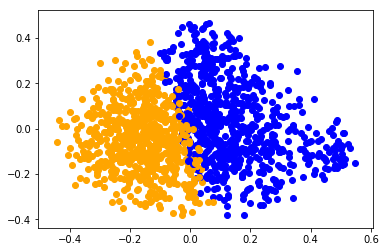

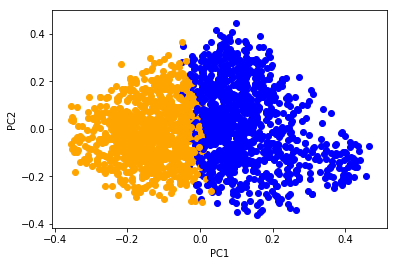

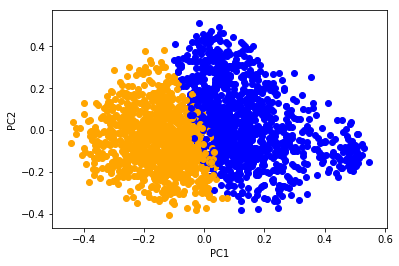

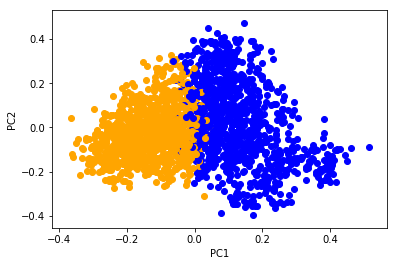

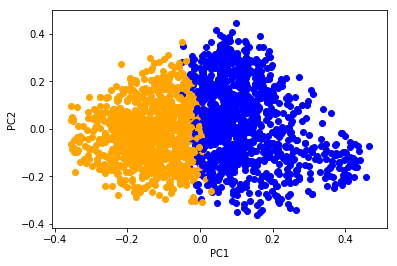

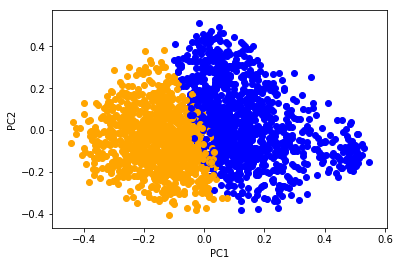

ValueError: object too deep for desired array

In [84]:
visualize_clusters(reduced_vectors_2, freq_nouns, dimensions, annotate, predictions_2)
visualize_clusters(reduced_vectors_5, freq_nouns, dimensions, annotate, predictions_5)
visualize_clusters(reduced_vectors_deps, freq_nouns, dimensions, annotate, predictions_deps)

In [26]:
#NOTE: THIS PART OF THE CODE IS TAKEN FROM ONE OF THE NLP1 LAB ASSIGNMENTS

# The perplexity used in t-SNE has significant effects on the resulting
# visualization. Generally, values in the range 5-30 work well. 
# If you have less data, or it is very high dimensional, you should go lower.
# If the data is packed closely together (lower dimension, more data), 
# then higher perplexity generally works better.


from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.palettes import d3
from bokeh.io import output_notebook
output_notebook()

def emb_scatter(data, names, perplexity=30.0, N=20):
    """
    Uses t-SNE with given perplexity to reduce the dimension of the 
    vectors in data to 2, plots these in a bokeh 2d scatter plot, 
    and colors them with N colors using K-means clustering of the 
    originial vectors. The colored dots are tagged with labels from
    the list names.
    
    :param data: numpy array of shape [num_vectors, embedding_dim]
    :param names: a list of words of length num_vectors in the same order as data
    :param perplexity: the perplexity for t-SNE
    :param N: the number of clusters to find by K-means
    """
    ## Try to find some clusters ##
    print("Finding clusters")
    kmeans = KMeans(n_clusters=N)
    kmeans.fit(data)
    klabels = kmeans.labels_

    ## Get a tsne fit ##
    print("Fitting tsne")
    tsne = TSNE(n_components=2, perplexity=perplexity)
    emb_tsne = tsne.fit_transform(data)
    
    ## Plot the tsne of the embeddings with bokeh ##
    # source: https://github.com/oxford-cs-deepnlp-2017/practical-1
    p = figure(tools="pan,wheel_zoom,reset,save",
               toolbar_location="above",
               title="T-SNE for most common words")

    # Set colormap as a list
    colormap = d3['Category20'][N]
    colors = [colormap[i] for i in klabels]

    source = ColumnDataSource(data=dict(x1=emb_tsne[:,0],
                                        x2=emb_tsne[:,1],
                                        names=names,
                                        colors=colors))

    p.scatter(x="x1", y="x2", size=8, source=source, color='colors')

    labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                      text_font_size="8pt", text_color="#555555",
                      source=source, text_align='center')
    p.add_layout(labels)

    show(p)

Loading BokehJS ...

In [20]:
emb_scatter(reduced_vectors_2, freq_nouns, perplexity=30.0, N=20)

Finding clusters
Fitting tsne


In [35]:
no_nouns = 100
#subsample vectors
perplexity = 30.0
N = 20

emb_scatter(reduced_vectors_2[:no_nouns], freq_nouns[:no_nouns], perplexity=perplexity, N=N)
emb_scatter(reduced_vectors_5[:no_nouns], freq_nouns[:no_nouns], perplexity=perplexity, N=N)
emb_scatter(reduced_vectors_deps[:no_nouns], freq_nouns[:no_nouns], perplexity=perplexity, N=N)

Finding clusters
Fitting tsne


Finding clusters
Fitting tsne


Finding clusters
Fitting tsne
